This code is designed to take the data from the noise measurements conducted during October/November 2020 and plot the FFT of these measurements to give us the frequencies present in our system. 

The datasets hold 20 10s line scans with a dwell time of 1ms. 

I plane to turn this into 4x 50s snippets of code to give us a longer dataset for the low frequency components and also to allow us to perform averaging of the FFT amplitudes which are retuned from scipy's FFT function to reduce the amplitude of noise down at the higher end of the noise spectra. This should also make it clearer which peaks are real and which one's are the result of noise in the FFT for a single line scan. 

In [27]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plot 
import pandas as pd

In [56]:
def import_data(file_name):
    # import the data file and split it up into 4 sets of 50s datasets. 
    
    data_set = np.loadtxt(file_name)
    x,y = data_set.shape
    
    z = data_set.reshape(int(x/4), int(y*4))
    
    return(z)

In [57]:
def get_params(params_file):
    # Extract parameters form data file 
    params_array = pd.read_table(params_file, names = ['Parameter', 'Value'])
    
    return(params_array)

In [125]:
def find_fft_amplitude(data_set, dwell_time):
    # Perform the FFT of the data. 
    signal_fft = np.fft.fft(data_set, norm = 'ortho')
    amplitude = np.abs(signal_fft)
    
    fft_freq = fftpack.fftfreq(len(data_set[1,:]), dwell_time)
    
    return(amplitude, fft_freq)

In [126]:
folder_path = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\Microscope Noise\\'
date = '20201023'
file_name = '20201023_NoiseScan_1239'

noise_data = import_data(folder_path + date + '\\' + file_name +'.dat')
params = get_params(folder_path + date + '\\' + file_name + 'Params.dat')
dwell_time = params['Value'][3]*10**(-6) # get dwell time in milliseconds. 
time = np.arange(0, len(noise_data[1,:])*dwell_time, dwell_time) # create time array

fft_amps, freq_array = find_fft_amplitude(noise_data, dwell_time)
mean_fft_amps = np.mean(fft_amps, axis = 0)

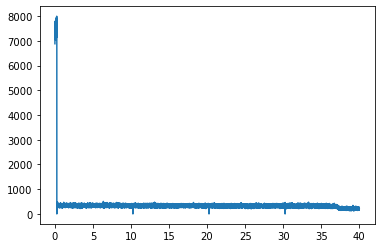

In [127]:
plot.plot(time, noise_data[0,:])

(0.0, 10000.0)

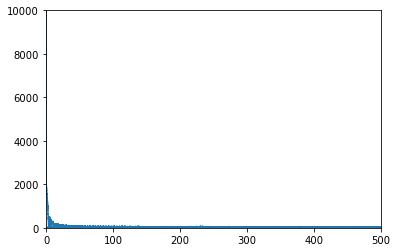

In [129]:
plot.plot(freq_array, mean_fft_amps)
plot.xlim(0,500)
plot.ylim(0, 10000)